# Determination of Toxic Comments and Analysis for the Minimization of Unintentional Model Bias

The primary goal of this project is to
design an accurate supervised and deep learning model
that can perform binary classification in order to
determine toxic and non-toxic comments from a social network.

Online conversations can be toxic and subjected to threats, abuse, or harassment. Online conversation toxicity can be defined as rude, disrespectful, make somebody leave a discussion, stop expressing oneself, and even give up on looking for dfferent opinions. To help improving online onversation and analyze the negative online ehaviors, the goal of this project is to build a supervised machine learning model that can perform binary classification, determine toxic and non-toxic comments, and analysis for the minimization of the unintended model bias concerning identity features such as race, gender, sex, religion, and disability, etc.

The dataset is collected by the Conversation AI [1] team, a research initiative founded by Jigsaw [2] and Google organized a Kaggle competition in 2019: Jigsaw Unintended Bias in Toxicity Classification [3]. The dataset was collected from Civil Comments
platform from 2015 to 2017.

### Exploratory Data Analysis

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# set the theme for the figure
# available palettes are deep, muted, pastel, bright, dark, and colorblind
sns.set(palette='deep')

# set the background
# available backgrouds are white, whitegrid, dark, darkgrid
sns.set_style("whitegrid")

# context is very important to view the figure, it enhances visibility
# available contexts are paper, notebook, talk, poster
sns.set_context('poster')

### Dataset Information:
The dataset contains 1.8 million observations and 45
features. The “comment_text” column contains the
comment from diverse range of conversations and
“target” column indicates how toxic a comment is and
target value ≥ 0.5 means comment is toxic. 
<br>**Toxicity subtype attributes:** severe toxicity, obscene, identity attack, insult, threat, and sexually explicit.
<br>**Reaction variables:** funny, wow, sad, likes,disagree. 
Identity variables can be classified into five categories.
<br>**Gender:** male, female, transgender, other gender
<br>**Sex:** heterosexual, homosexual gay or lesbian, bisexual, other sexual orientation
<br>**Religion:** Christian, Jewish, Muslim, Hindu, Buddhist, atheist, other religion
<br>**Race:** black, white, Asian, Latino, and other race or ethnicity
<br>**Disability:** physical disability, intellectual or learning disability, psychiatric or mental illness, other disability

Comment: “haha you guys are a bunch of losers.”
<br>Target Label (Toxicity): 0.89
<br>Severe toxicity: 0.02
<br>Identity attack: 0.02
<br>Insult: 0.87
<br>All others: 0.0

<br>Comment: “The woman is basically a slave.”
<br>Target Label (Toxicity): 0.83
<br>Identity attack: 0.83
<br>Insult: 0.83
<br>Female: 1.0
<br>All others: 0.0

<br>Comment: “I love the idea of upvoting entire articles.”
<br>Target Label (Toxicity): 0.0
<br>All others: 0.0

### Loading the dataset

In [137]:
df = pd.read_csv('train.csv', parse_dates=['created_date'])
df['created_date'] = pd.to_datetime(df['created_date']).values.astype('datetime64[M]')

display(df.head())

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


#### Check the data types, the number of observations and features in the dataset

In [138]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   id                                   int64         
 1   target                               float64       
 2   comment_text                         object        
 3   severe_toxicity                      float64       
 4   obscene                              float64       
 5   identity_attack                      float64       
 6   insult                               float64       
 7   threat                               float64       
 8   asian                                float64       
 9   atheist                              float64       
 10  bisexual                             float64       
 11  black                                float64       
 12  buddhist                             float64       
 13  christian                  

### Distribution of the target variable

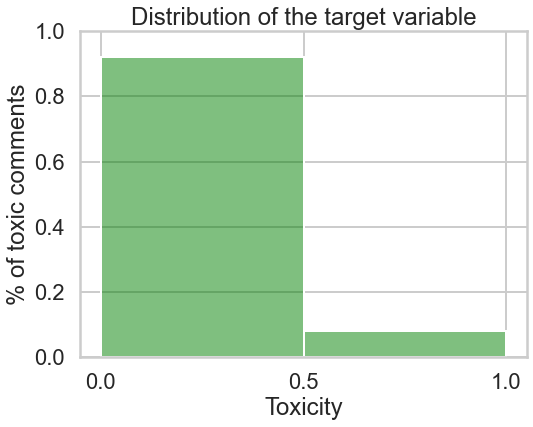

In [139]:
# create a new figure and define the dimension of the figure
plt.figure(figsize=(8,6))

# create a histogram of the target variable
sns.histplot(data=df, x='target', binwidth=0.5, color='green', alpha=0.5, stat='probability')

# set the title, x and y-axis label of the figure
plt.title('Distribution of the target variable')
plt.xlabel('Toxicity')
plt.ylabel('% of toxic comments')

# set the range for x and y-axis
plt.xticks(np.arange(0, 1.1, 0.5))
plt.yticks(np.arange(0, 1.1, 0.2))

plt.show()

The distribution of the target variable represents two categories such as non-toxic (0) and toxic (1). Target variable < 0.5 belongs to non-toxic and target variable ≥ 0.5 belongs to toxic comments. From the above figure, we can see that the dataset is highly imbalanced. Among 1.8M observations, 92% (1.66M) of the data belongs to non-toxic and only 8% (0.14M) of the data belongs to toxic comments. 

### Percent of toxic comments related to different identities using target and population amount of each identity as weights
Among these 24 identity variables, the most targeted identities are white, black, homosexual gay or lesbian, Muslim, Jewish, female etc. Here, for each observation we have a value of target variable which represents how toxic the comment is. Each identity variable has also a value between 0 to 1 to identify how much they have been targeted. Using these two aspects, we can find which identities are more frequently related to toxic comments. To determine the weighted toxicity, first calculate the sum of the product of each identity variable with the target variable. Then, find the ratio of this sum of product to the number of identity variables which are greater than zero. 

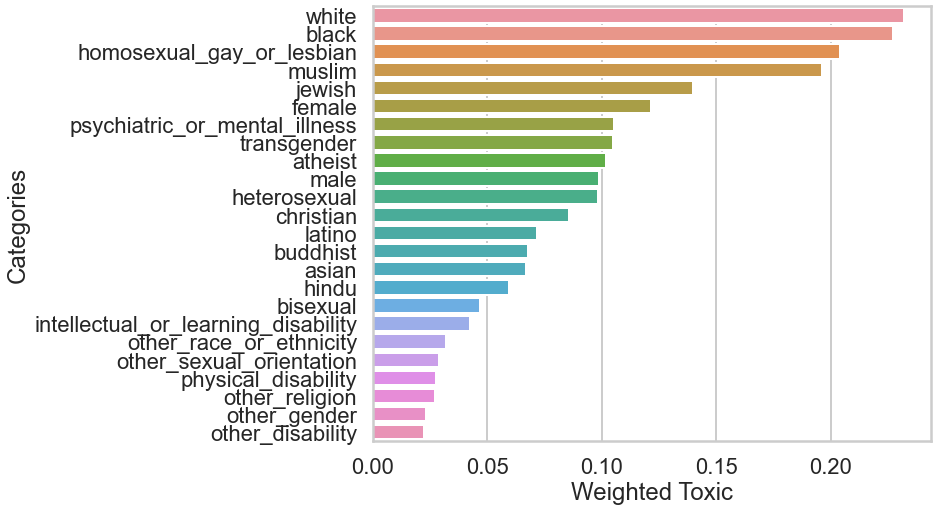

In [140]:
# create lists based on identity categories
gender = ['male', 'female', 'transgender', 'other_gender']
sex = ['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']
religion = ['christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion']
race = ['black', 'white', 'asian', 'latino', 'other_race_or_ethnicity']
disability = ['physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness','other_disability']

# combine the lists
identity_variables = gender + sex + religion + race + disability

# create a new dataframe and drop the missing values
demographics = df[['target'] + identity_variables].dropna()

#  Percent of toxic comments related to different identities 
# using target and population amount of each identity as weights
weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis=0).sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)

# create a new figure
plt.figure(figsize=(10,8))

# barplot
ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index)
plt.ylabel('Categories')
plt.xlabel('Weighted Toxic')
plt.show()

### Correlation heatmap of target variable and the identity variables which contain reactions in the comments

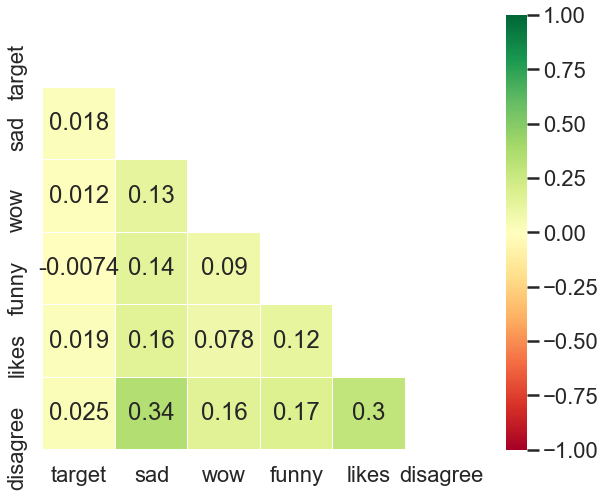

In [141]:
# create a list of reaction variables
reaction_emos = ["sad", "wow", "funny", "likes", "disagree"]

# create a dataframe with the reaction variables
emotion = df[["target"] + reaction_emos]

# create a new figure and define the figure size
plt.figure(figsize=(10,8))

# create a mask to remove the upper triangular values
mask = np.zeros_like(emotion.corr())
mask[np.triu_indices_from(mask)] = True

# heatmap
sns.heatmap(emotion.corr(), linewidths=0.1, vmax=1.0, 
            vmin=-1., square=True, cmap='RdYlGn', 
            linecolor='white', annot=True, mask = mask)
plt.show()

The above heatmap represents the pairwise correlations between target variable and the reaction variables in the comments such as sad, wow, funny, likes, disagree. The strongest correlation value 0.34 exists between ‘sad’ and ‘disagree’ maybe because of the content of comments that people disagree, make them sad as well. Looking at the correlation to the target variable, the correlations are very weak. Maybe the reason is the data is collected from the Civil Comments platform from 2015 to 2017 and these data are not coming from popular social networking sites such as Reddit, Facebook, Instagram or Twitter where reactions are very popular. This can be an explanation for the low number of reaction votes and the weak correlation.

### Correlation heatmap of target variable, toxicity subtype attributes and the identity variables

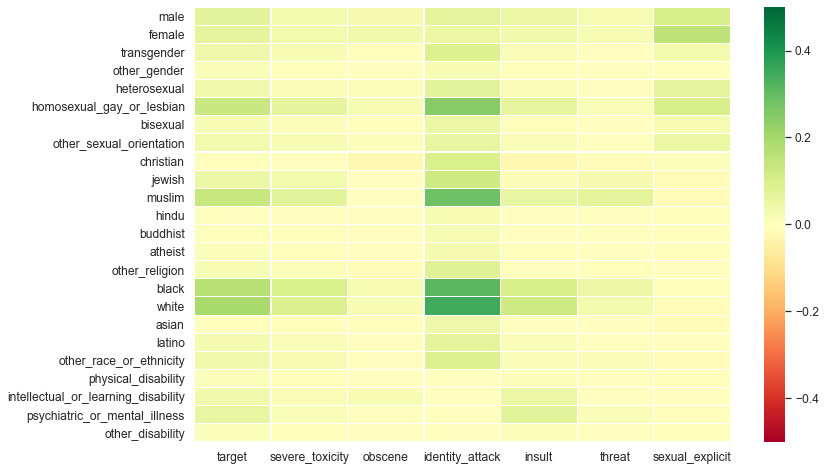

In [142]:
# create a tuple of toxicity subtype attributes along with the target variable
columns = ('target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit')

identities = tuple(df[identity_variables])

# determine the correlation between the variables
rows = [{c:df[f].corr(df[c]) for c in columns} for f in identities]

# create a dataframe of the correlations
toxicity_correlations = pd.DataFrame(rows, index=identities)

plt.figure(figsize=(12, 8))
sns.set(font_scale=1.1)

# heatmap
sns.heatmap(toxicity_correlations, vmin=-0.5, vmax=0.5, cmap='RdYlGn', linewidths=0.1, linecolor='white')
plt.show()

### Distribution of the toxicity subtype attributes

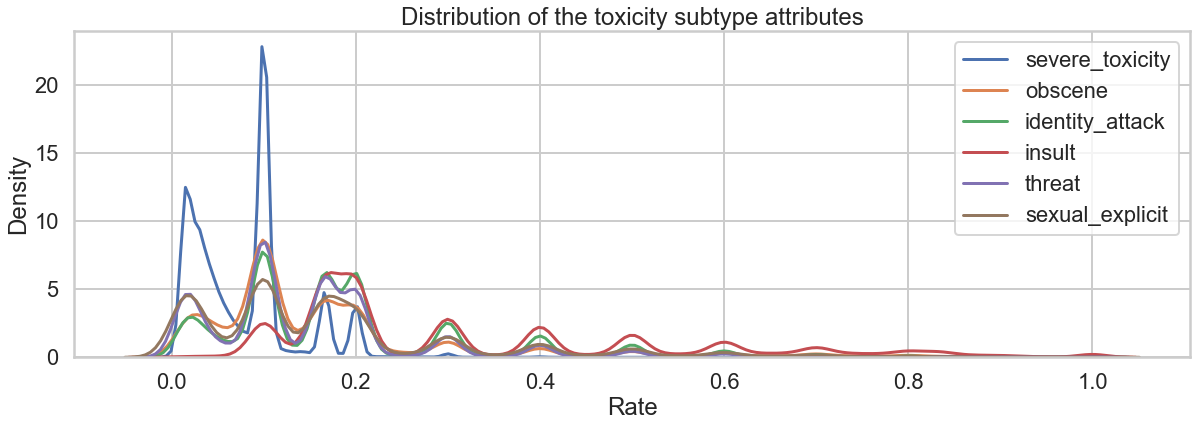

In [143]:
# create a list of the toxicity subtype attributes
toxicity_subtype_attributes = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']

sns.set(palette='deep')
sns.set_style("whitegrid")
sns.set_context('poster')

# create a new figure and define the dimension of the figure
plt.figure(figsize=(20,6))

# create a for loop to plot the distribution of all columns altogether
for col in toxicity_subtype_attributes:
    
    # plotting kernel density estimation (kde) where values are greater than 0
    sns.kdeplot(df[df[col]>0][col], label=col)
    plt.xlabel("Rate")
    plt.legend()

plt.title("Distribution of the toxicity subtype attributes")
plt.show()

The distribution of the toxicity subtype attributes such as severe toxicity, obscene (offensive or disgusting), identity attack, insult, threat and sexually explicit (sexual harassment). Most of the attributes belong to the value less than 0.5.

### Time series analysis

In [144]:
# combine the lists
col_list = ['created_date', 'target'] + identity_variables

# create a new copy of the dataset
identity_df = df.copy()

# remove the missing values
identity_df = identity_df[col_list].dropna()

# weight the identity scores, dividing each value by the sum of the whole column except the date and target variable
weighted_identity_df = identity_df.iloc[:, 2:]/identity_df.iloc[:, 2:].sum()

# multipy the weighted columns with the target variable
weighted_identity_df = weighted_identity_df.multiply(identity_df.loc[:, 'target'], axis=0)

# include the date column in the weighted dataframe
weighted_identity_df['created_date'] = pd.to_datetime(identity_df['created_date'])

# group and sort the dataframe based on dates
weighted_identity_df = weighted_identity_df.groupby(['created_date']).sum().sort_index()

# display(weighted_identity_df.head())

In [145]:
def time_series_plot(dataframe, col_list, title):
    """
    This function creates a time-series plot for a given list of variables
    Args:
        dataframe (DataFrame):
        col_list (list): list of columns
        title (str): title of the figure
    Returns:
        time-series plot
    """
    for col in col_list:
        plt.plot(dataframe.index, dataframe[col], label=col)

    plt.xticks(rotation=90)
    plt.ylabel('Ratio of Toxic Comments')
    plt.title("Time Series plot of toxic comments targeting " + title)
    plt.legend()

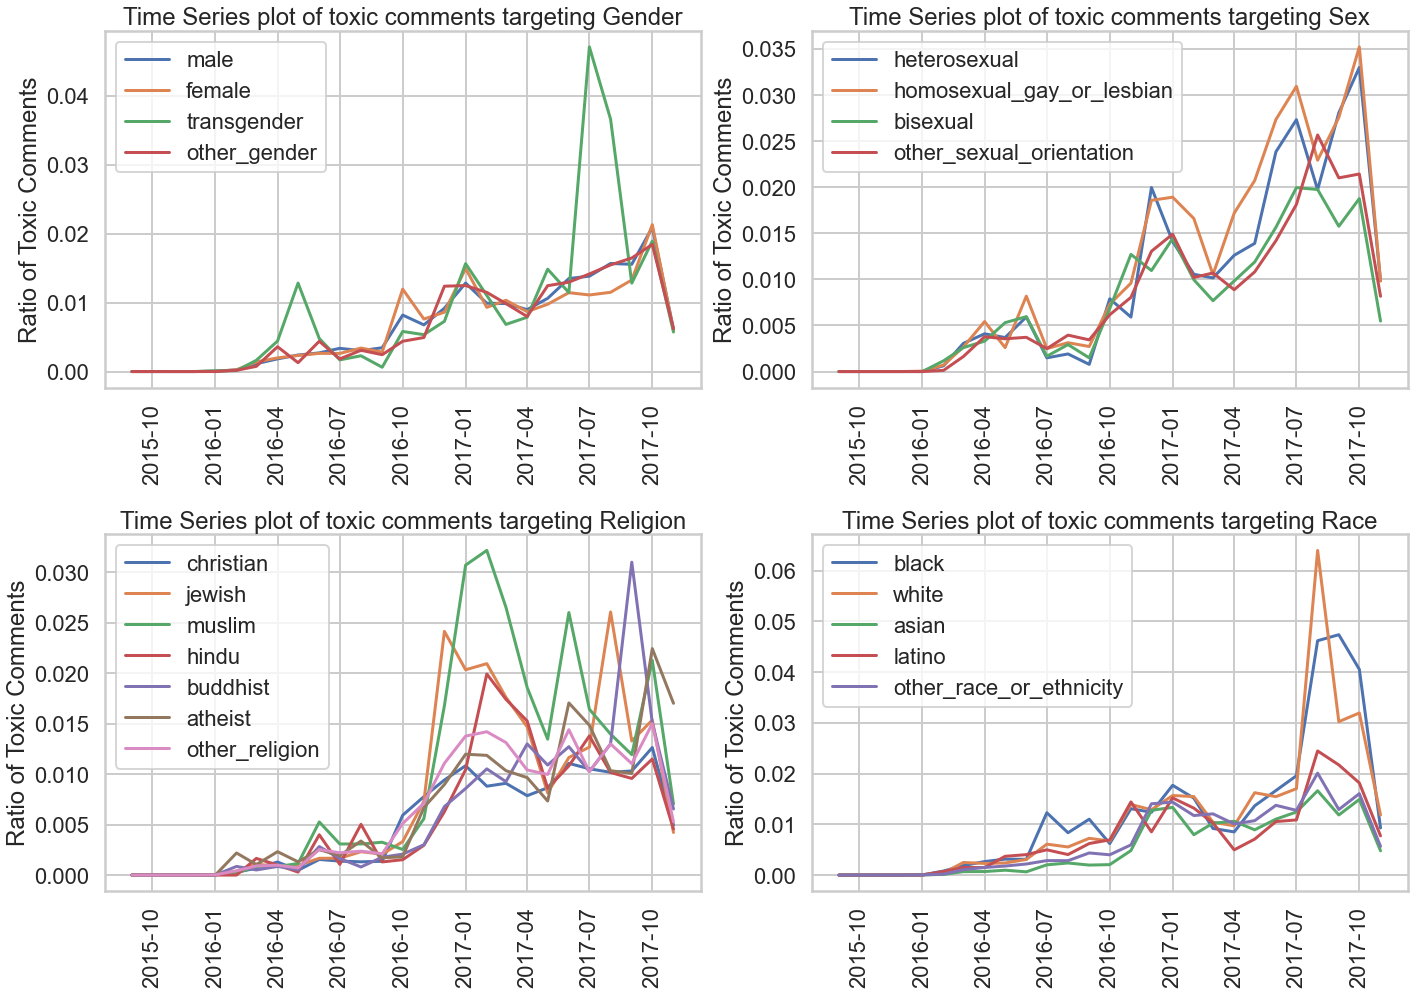

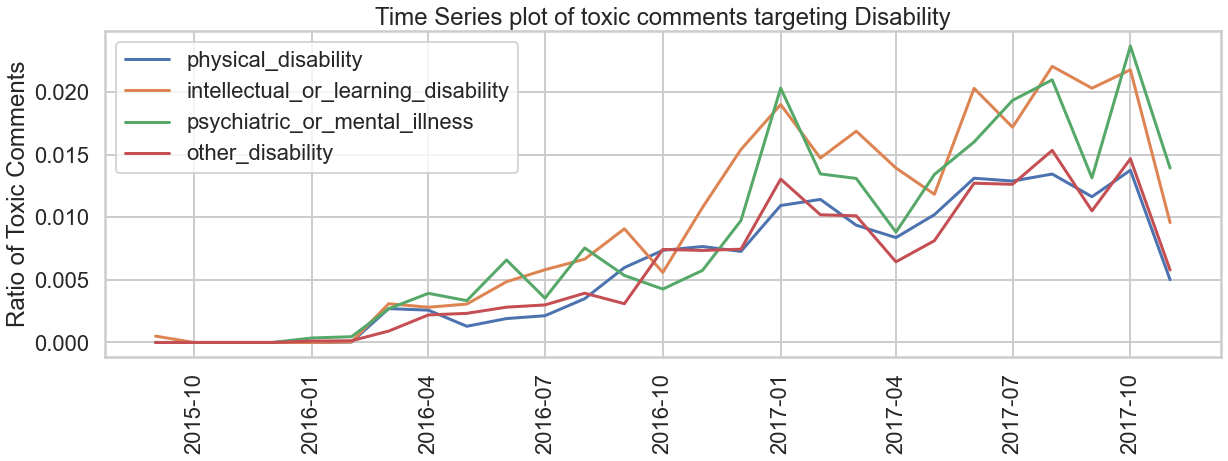

In [146]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
time_series_plot(weighted_identity_df, gender, 'Gender')

plt.subplot(3,2,2)
time_series_plot(weighted_identity_df, sex, 'Sex')

plt.subplot(3,2,3)
time_series_plot(weighted_identity_df, religion, 'Religion')

plt.subplot(3,2,4)
time_series_plot(weighted_identity_df, race, 'Race')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,6))
time_series_plot(weighted_identity_df, disability, 'Disability')
plt.show()

The dataset contains news articles from different sources. From the time-series plot of toxic comments targeting gender, we can see that transgender people are mostly targeted in the online toxic comments. We can also observe that there is a sharp increase of toxic comments regarding transgender people during July 2017 maybe because US President Donald Trump tweetted about a ban on
transgender people serving in the military. 

Before the shutdown of the Civil Comments, at October 2017, the ratio of toxic comments targeting homosexual gay or lesbian, and heterosexual reached maximum. 

From the time-series plot of toxic comments targeting religion, it’s clear that Muslim people were highly targeted for toxic comments in online conversations maybe because of the current global fear of extremism. It’s still surprising that people live in modern society and also target human beings by their color especially the white and black or disability. 